# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# **Loading Data**

In [2]:
df_train = pd.read_csv("/kaggle/input/black-friday-sale/train.csv")

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# **Data Cleaning and Wrangling**

In [4]:
df= df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
missing_mean = df.isnull().mean()
print(missing_mean)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64


In [8]:
# Fill with the most frequent category
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipykernel_18/1765773521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
/tmp/ipykernel_18/1765773521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df.shape

(550068, 12)

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [12]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
le = LabelEncoder()

df['City_Category'] = le.fit_transform(df['City_Category'])

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,55+,16,2,4+,0,8,8.0,16.0,7969


In [15]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [16]:
df['User_ID'].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [17]:
df['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [18]:
# Convert '4+' to 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)

# Convert the column to numeric
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

In [19]:
import category_encoders as ce

cols_to_encode = ['User_ID']
cols_present = set(cols_to_encode).intersection(set(df.columns))
encoder = ce.BinaryEncoder(cols=cols_present)
df = encoder.fit_transform(df)

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

In [20]:
cols_to_encode = ['Product_ID']
cols_present = set(cols_to_encode).intersection(set(df.columns))
encoder = ce.BinaryEncoder(cols=cols_present)
df = encoder.fit_transform(df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID_0                   550068 non-null  int64  
 1   User_ID_1                   550068 non-null  int64  
 2   User_ID_2                   550068 non-null  int64  
 3   User_ID_3                   550068 non-null  int64  
 4   User_ID_4                   550068 non-null  int64  
 5   User_ID_5                   550068 non-null  int64  
 6   User_ID_6                   550068 non-null  int64  
 7   User_ID_7                   550068 non-null  int64  
 8   User_ID_8                   550068 non-null  int64  
 9   User_ID_9                   550068 non-null  int64  
 10  User_ID_10                  550068 non-null  int64  
 11  User_ID_11                  550068 non-null  int64  
 12  User_ID_12                  550068 non-null  int64  
 13  Product_ID_0  

In [22]:
le = LabelEncoder()

df['Age'] = le.fit_transform(df['Age'])

In [23]:
df.head()

,User_ID_0,User_ID_1,User_ID_2,User_ID_3,User_ID_4,User_ID_5,User_ID_6,User_ID_7,User_ID_8,User_ID_9,...,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,2,0,3,8.0,16.0,8370
1,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,2,0,12,8.0,16.0,1422
3,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,2,0,12,14.0,16.0,1057
4,0,0,0,0,0,0,0,0,0,0,...,1,6,16,2,4,0,8,8.0,16.0,7969


In [24]:
df.columns

Index(['User_ID_0', 'User_ID_1', 'User_ID_2', 'User_ID_3', 'User_ID_4',
       'User_ID_5', 'User_ID_6', 'User_ID_7', 'User_ID_8', 'User_ID_9',
       'User_ID_10', 'User_ID_11', 'User_ID_12', 'Product_ID_0',
       'Product_ID_1', 'Product_ID_2', 'Product_ID_3', 'Product_ID_4',
       'Product_ID_5', 'Product_ID_6', 'Product_ID_7', 'Product_ID_8',
       'Product_ID_9', 'Product_ID_10', 'Product_ID_11', 'Gender', 'Age',
       'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

In [25]:
predictors = ['Gender', 'Age','Occupation', 'City_Category', 'Stay_In_Current_City_Years',
              'Marital_Status', 'Product_Category_1', 'Product_Category_2','Product_Category_3']

In [26]:
X= df[predictors]

In [27]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,8.0,16.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,8.0,16.0
3,0,0,10,0,2,0,12,14.0,16.0
4,1,6,16,2,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,8.0,16.0
550064,0,2,1,2,3,0,20,8.0,16.0
550065,0,2,15,1,4,1,20,8.0,16.0
550066,0,6,1,2,2,0,20,8.0,16.0


In [28]:
df['Purchase'] = np.sqrt(df['Purchase'])

<Axes: >

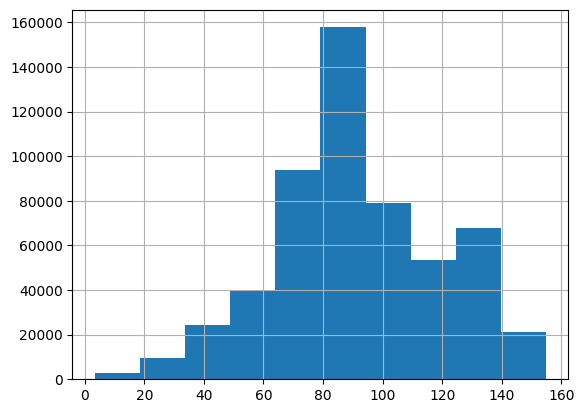

In [29]:
df['Purchase'].hist()

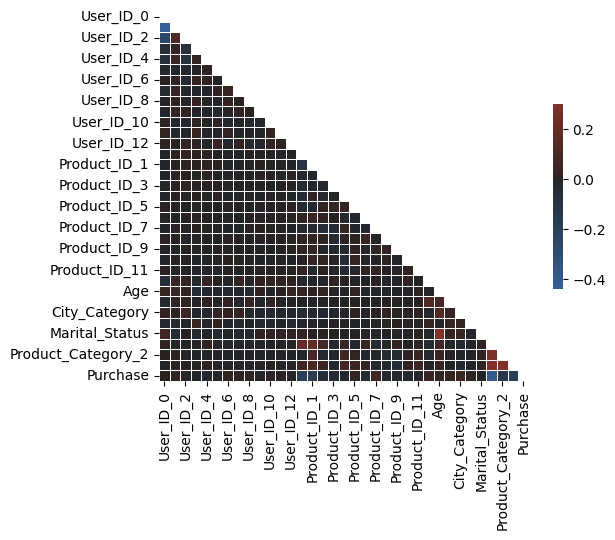

In [30]:
import seaborn as sns

# Define the variables corr and mask
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom dark diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [31]:
y= df['Purchase']

In [32]:
y

0          91.487704
1         123.288280
2          37.709415
3          32.511536
4          89.269256
             ...    
550063     19.183326
550064     19.261360
550065     11.704700
550066     19.104973
550067     22.135944
Name: Purchase, Length: 550068, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [34]:
print(X_train)

        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
178247       1    5           7              1                           3   
196647       1    1          12              2                           4   
418590       1    2           5              1                           1   
408727       1    1           4              1                           2   
216416       1    1           4              1                           1   
...        ...  ...         ...            ...                         ...   
110268       1    4          17              2                           2   
259178       1    2          14              2                           2   
365838       0    1           1              1                           1   
131932       0    1           4              1                           2   
121958       0    1           2              0                           2   

        Marital_Status  Product_Category_1  Product_Category_2 

In [35]:
print(X_test)

        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
84432        1    5          19              2                           3   
72724        0    3          11              1                           1   
197032       0    3           0              0                           2   
353704       1    1           4              0                           3   
91198        1    1           4              1                           0   
...        ...  ...         ...            ...                         ...   
133324       1    6          13              1                           2   
138718       0    2           4              1                           3   
22886        1    3          20              0                           2   
137110       1    3           7              0                           0   
515193       0    0          10              0                           3   

        Marital_Status  Product_Category_1  Product_Category_2 

In [36]:
print(y_train)

178247     88.317609
196647     93.150416
418590     89.252451
408727     99.257242
216416    125.713961
             ...    
110268     43.150898
259178     92.860110
365838     83.390647
131932     78.428311
121958     84.534017
Name: Purchase, Length: 440054, dtype: float64


In [37]:
print(y_test)

84432     138.354617
72724     124.551194
197032     88.328931
353704    124.318140
91198      67.022384
             ...    
133324    138.343775
138718     88.634079
22886      63.537391
137110     86.411805
515193     89.453899
Name: Purchase, Length: 110014, dtype: float64


In [38]:
print(X_train)

        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
178247       1    5           7              1                           3   
196647       1    1          12              2                           4   
418590       1    2           5              1                           1   
408727       1    1           4              1                           2   
216416       1    1           4              1                           1   
...        ...  ...         ...            ...                         ...   
110268       1    4          17              2                           2   
259178       1    2          14              2                           2   
365838       0    1           1              1                           1   
131932       0    1           4              1                           2   
121958       0    1           2              0                           2   

        Marital_Status  Product_Category_1  Product_Category_2 

In [39]:
print(X_test)

        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
84432        1    5          19              2                           3   
72724        0    3          11              1                           1   
197032       0    3           0              0                           2   
353704       1    1           4              0                           3   
91198        1    1           4              1                           0   
...        ...  ...         ...            ...                         ...   
133324       1    6          13              1                           2   
138718       0    2           4              1                           3   
22886        1    3          20              0                           2   
137110       1    3           7              0                           0   
515193       0    0          10              0                           3   

        Marital_Status  Product_Category_1  Product_Category_2 

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
friday_lr = LinearRegression()

In [42]:
friday_lr.fit(X_train, y_train)
friday_lr= friday_lr.score(X_train, y_train)
print('Linear Regression on trained data =', friday_lr)

Linear Regression on trained data = 0.160298258554311


In [43]:
# Assuming friday_lr is your linear regression model
friday_lr = LinearRegression()
friday_lr.fit(X_train, y_train)  # You should fit the model on the training data, not the test data

# Calculate the score of the model on the test data
score = friday_lr.score(X_test, y_test)

print('Linear Regression on test data =', score)

Linear Regression on test data = 0.15812166194754262


In [44]:
y_predict_train = friday_lr.predict(X_train)
y_predict_test = friday_lr.predict(X_test)

In [45]:
mse_train = mean_squared_error(y_train, y_predict_train)
mse_train

622.2542875141918

In [46]:
mse_test = mean_squared_error(y_test, y_predict_test)
mse_test

619.4115592681668

In [47]:
rmse_train = np.sqrt(mse_train)
rmse_train

24.945025305944107

In [48]:
rmse_test = np.sqrt(mse_test)
rmse_test

24.887980216726444

In [49]:
df = pd.DataFrame({" Y Prediction": y_predict_test,
                   "Y Actual": y_test}).reset_index(drop=True)
df.head(10)

,Y Prediction,Y Actual
0,106.965867,138.354617
1,101.764242,124.551194
2,81.788825,88.328931
3,101.056708,124.318140
4,89.421974,67.022384
5,91.473123,83.456576
6,92.552868,93.610897
7,100.697437,139.093494
8,96.392532,83.767535
9,104.563879,124.875938


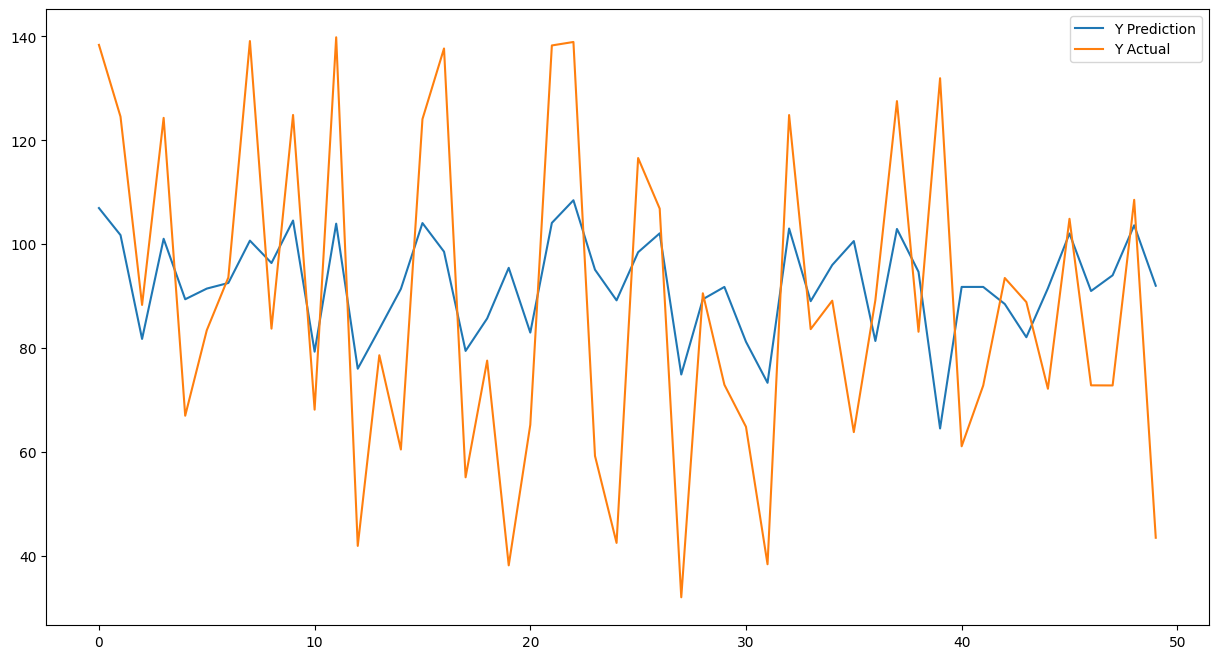

In [50]:
plt.figure(figsize = (15,8))
plt.plot(df[:50])
plt.legend(["Y Prediction", "Y Actual"])

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr.score(X_train, y_train)

0.7872181476034679

In [52]:
rfr.score(X_test, y_test)

0.6564692043426047

In [53]:
y_predict_test = rfr.predict(X_test)

In [54]:
df = pd.DataFrame({" Y Prediction": y_predict_test,
                   "Y Actual": y_test}).reset_index(drop=True)
df.head(10)

,Y Prediction,Y Actual
0,117.717788,138.354617
1,113.254023,124.551194
2,82.165922,88.328931
3,116.518085,124.318140
4,123.919759,67.022384
5,73.633188,83.456576
6,65.484477,93.610897
7,124.675649,139.093494
8,67.618470,83.767535
9,104.348214,124.875938


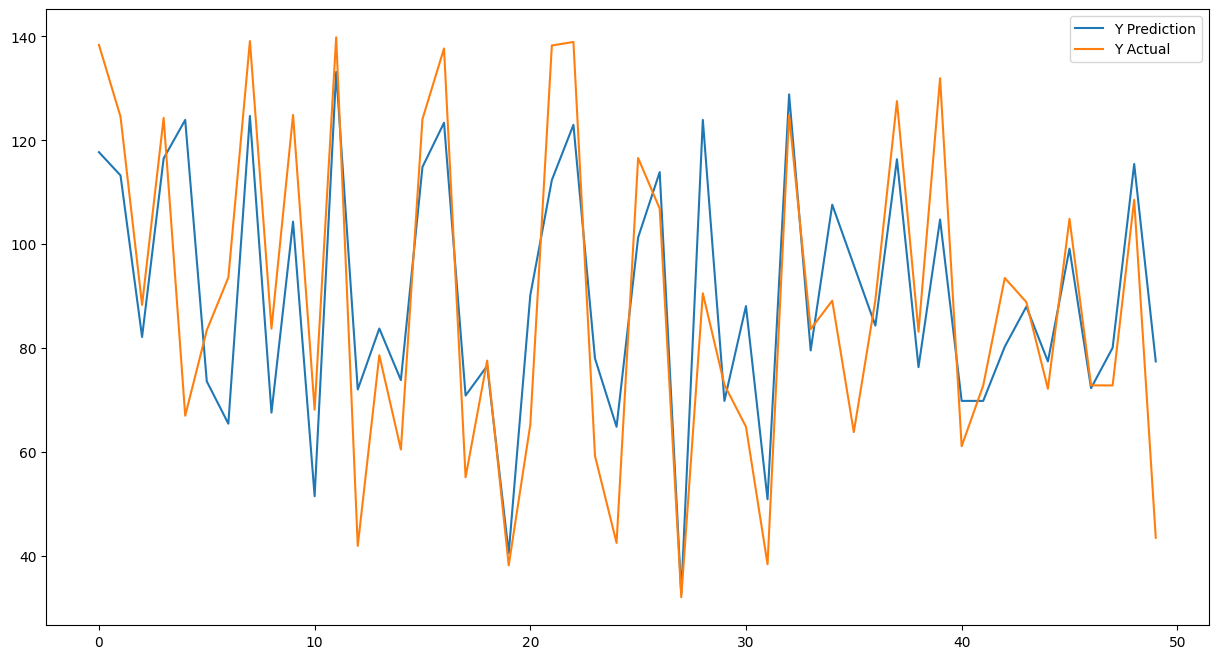

In [55]:
plt.figure(figsize = (15,8))
plt.plot(df[:50])
plt.legend(["Y Prediction", "Y Actual"])